# Regressão Linear com StatsModel
<b>Author:</b> Alex Mercedes
<br><b>Creation:</b> 2026-02-18
<br><b>Description:</b> Aula de Calculo de Regressão Linear com StatsModel
<br><b>Pipeline Associado:</b> N/A 
<br><b>Notebook Associado:</b> inicio_ia_2

## Definições
<b>Description:</b> Definição de variáveis e Bibliotecas utilizadas no processo

### Definição Bibliotecas utilizadas no processo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

### Definição Variáveis utilizadas no processo

## Obter DataFrames
<b>Description:</b> Dataframe para previsão de consumo de combustivel<br>
<b>Dataframe_1:</b> df_mt_cars.csv<br>
<b>Regras_1:</b><br>
- Local: arquivos/mt_cars.csv<br>
- Campos<br>
    - <b>Unnamed:</b> nome do carro<br>
    - <b>mpg:</b> consumo<br>
    - <b>cyl:</b> cilindros<br>
    - <b>disp:</b> cilindradas<br>
    - <b>hp:</b> potência<br>
    - <b>drat:</b> eixo traseiro<br>
    - <b>wt:</b> peso<br>
    - <b>qsec:</b> veloc por quarto de milha<br>
    - <b>vs:</b> tipo motor<br>
    - <b>am:</b> tipo transmissão<br>
    - <b>gear:</b> marchas<br>
    - <b>carb:</b> carburadores<br>

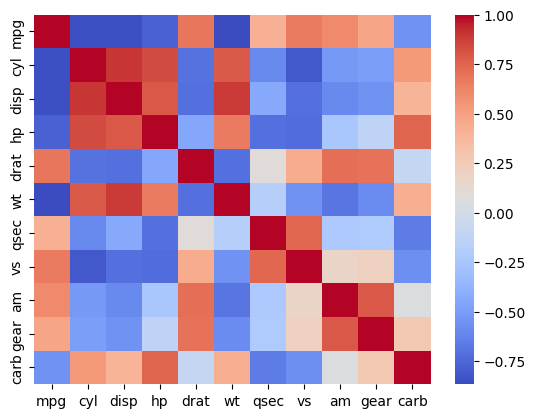

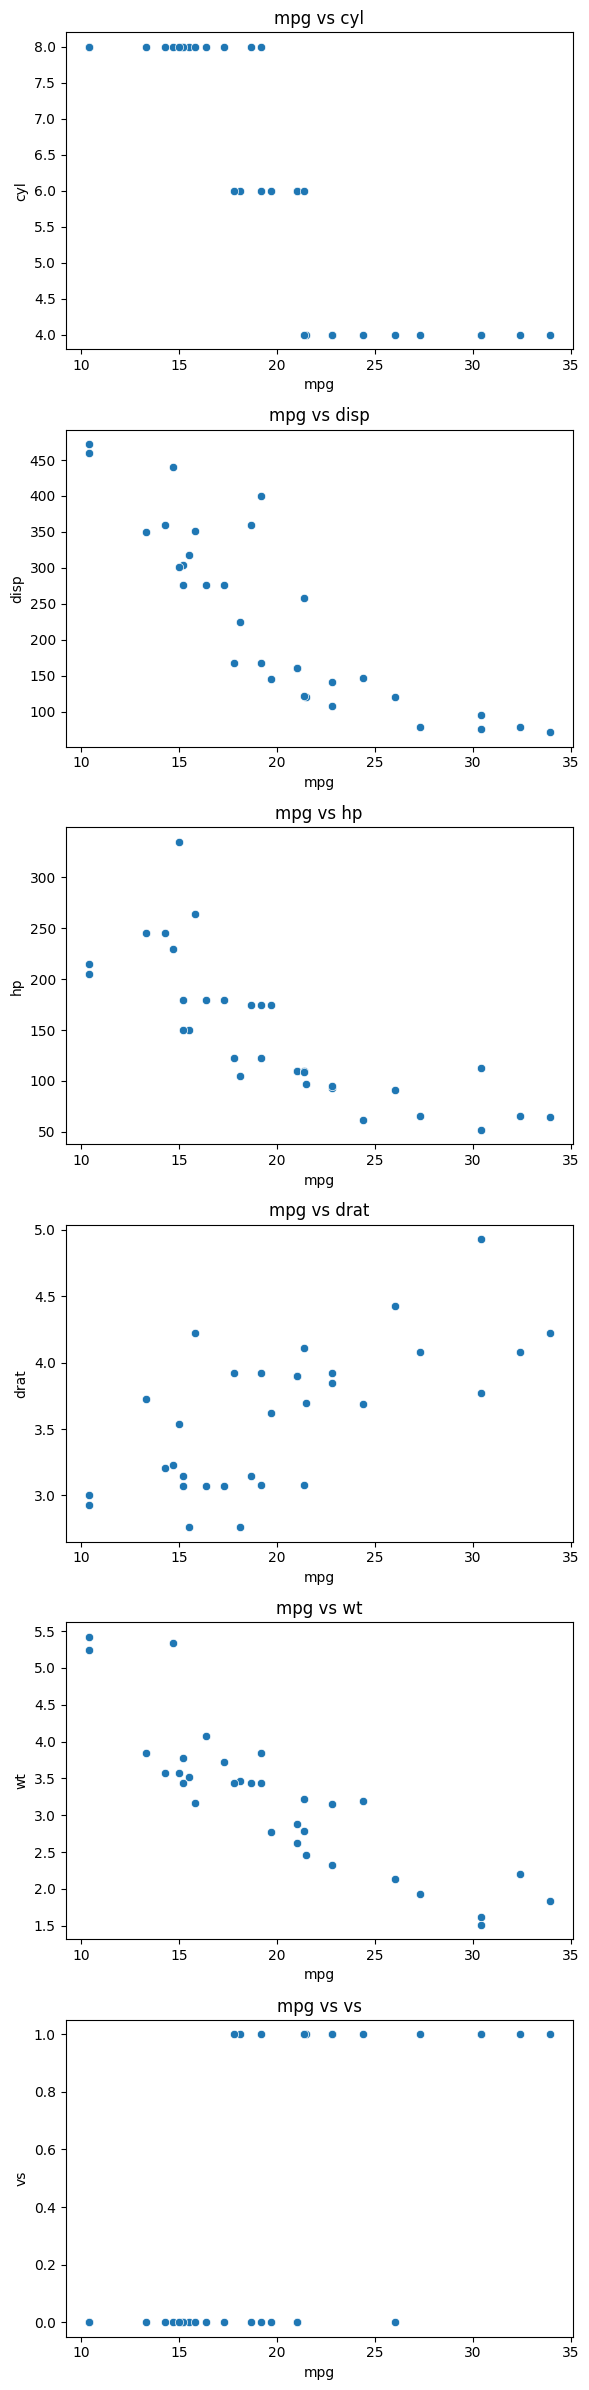

In [2]:
base = pd.read_csv('arquivos/mt_cars.csv')
base.shape
base.head()
base = base.drop('Unnamed: 0', axis=1)
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
# base.head()
# base.describe()
# base.info()
# criar par de colunas para análise de correlação
colum_pair = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'drat'), ('mpg', 'wt'), ('mpg', 'vs')] 
n_plots = len(colum_pair)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4*n_plots)) 

for i, pair in enumerate(colum_pair):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')
    
plt.tight_layout()
plt.show()

In [ ]:
# aic 156.6 bic 162.5
# modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base).fit()

# aic 165.1 bic 169.5
modelo = sm.ols(formula='mpg ~ disp + cyl', data=base).fit()

# aic 179.1 bic 183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=base).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Fri, 20 Feb 2026   Prob (F-statistic):           5.82e-07
Time:                        00:36:13   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

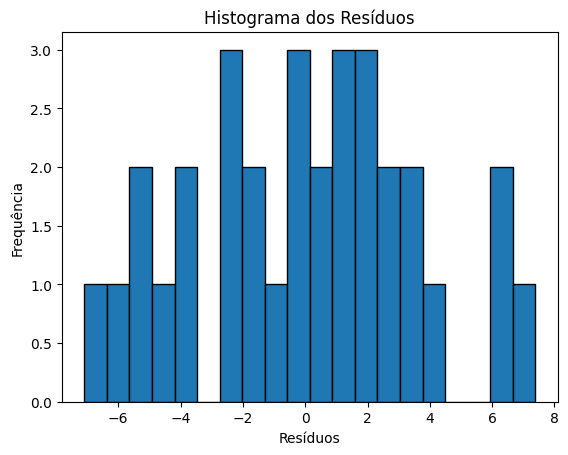

In [8]:
residuos = modelo.resid
plt.hist(residuos, bins=20, edgecolor='k')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

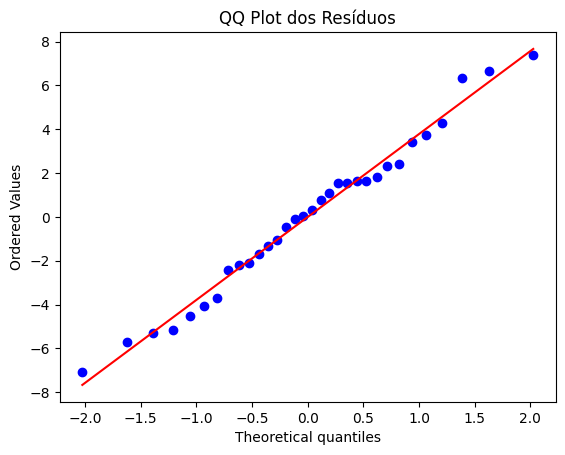

In [9]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()

In [11]:
# h0 (hipotese nula) dados estao normalmente distribuidos
# p < 0.05 rejeitamos a h0, ou seja, os dados nao estao normalmente distribuidos
# p > 0.05 falhamos em rejeitar a h0, ou seja, os dados estao normalmente distribuidos


stat, pval = stats.shapiro(residuos)
print(f'Shapiro Wilk estatística: {stat:.3f}, pval: {pval:.3f}')

Shapiro Wilk estatística: 0.981, pval: 0.822
